In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [28]:
#load data
df = pd.read_csv('C:\\Git\\a3-predicting-car-price-Arun-vEDU\\Cars.csv')



In [29]:
#Step 1: Prepare data
# y is simply the selling price colomn
y = df["selling_price"]

# Covert into log scale
y_log = np.log(df["selling_price"])


# Using pd.cut to bin data into 4 classes
binned_data = pd.cut(y_log , bins=4) #now our y is four classes thus require multinomial


print(binned_data)

0       (11.761, 13.214]
1       (11.761, 13.214]
2       (11.761, 13.214]
3       (11.761, 13.214]
4       (11.761, 13.214]
              ...       
8123    (11.761, 13.214]
8124    (11.761, 13.214]
8125    (11.761, 13.214]
8126    (11.761, 13.214]
8127    (11.761, 13.214]
Name: selling_price, Length: 8128, dtype: category
Categories (4, interval[float64, right]): [(10.303, 11.761] < (11.761, 13.214] < (13.214, 14.666] < (14.666, 16.118]]


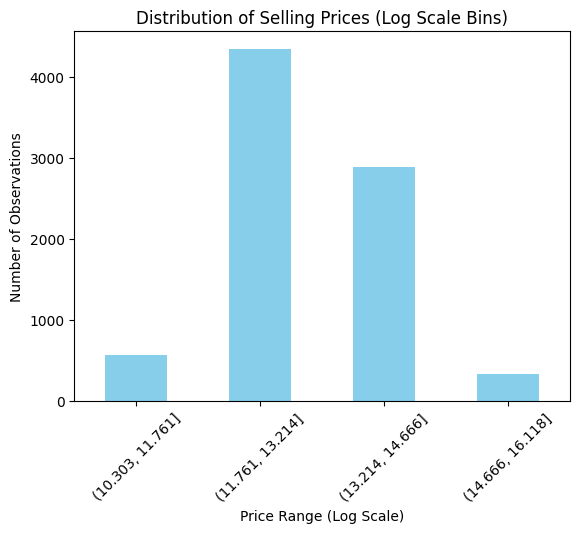

In [30]:
# plot the values
# Value counts for each bin
bin_counts = pd.value_counts(binned_data)

# Bar plot
bin_counts.sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Selling Prices (Log Scale Bins)')
plt.xlabel('Price Range (Log Scale)')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.show()

In [41]:
import numpy as np
import time
import matplotlib.pyplot as plt

class LogisticRegression:
    
    def __init__(self, k, n, method, alpha=0.01, max_iter=5000, use_penalty=False, penalty='ridge', lambda_=0.01):
        self.k = k  # Number of classes
        self.n = n  # Number of features
        self.alpha = alpha  # Learning rate
        self.max_iter = max_iter  # Maximum iterations
        self.method = method  # Optimization method: 'batch', 'minibatch', or 'sto'
        self.use_penalty = use_penalty  # Whether to use penalty (regularization)
        self.penalty = penalty  # Type of penalty ('ridge' for L2)
        self.lambda_ = lambda_  # Regularization strength
        self.W = np.random.rand(n + 1, k)  # Initialize weights

    def fit(self, X, Y):
        self.W = np.random.rand(self.n + 1, self.k)   # Initialize weights
        self.losses = []  # To store loss values
        
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad = self.gradient(X, Y)
                self.losses.append(loss)
                self.W -= self.alpha * grad  # Update weights
                if i % 500 == 0:
                    print(f"Loss at iteration {i}: {loss}")
            print(f"Time taken: {time.time() - start_time}")
        
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                indices = np.random.choice(X.shape[0], size=batch_size, replace=False)  # Randomly select indices for the batch
                batch_X = X[indices]
                batch_Y = Y[indices]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W -= self.alpha * grad  # Update weights
                if i % 500 == 0:
                    print(f"Loss at iteration {i}: {loss}")
            print(f"Time taken: {time.time() - start_time}")
        
        elif self.method == "sto":
            start_time = time.time()
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])  # Randomly select an index
                X_train = X[idx, :].reshape(1, -1)  # Reshape for a single sample
                Y_train = Y[idx].reshape(1, -1)  # Reshape for a single sample
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W -= self.alpha * grad  # Update weights
                if i % 500 == 0:
                    print(f"Loss at iteration {i}: {loss}")
            print(f"Time taken: {time.time() - start_time}")
        
        else:
            raise ValueError('Method must be one of the following: "batch", "minibatch", or "sto".')
        
    def gradient(self, X, Y):
        m = X.shape[0]  # Number of training examples
        h = self.h_theta(X, self.W)  # Hypothesis
        loss = -np.sum(Y * np.log(h)) / m  # Cross-entropy loss
        
        # Apply penalty if use_penalty is True
        if self.use_penalty and self.penalty == 'ridge':
            loss += (self.lambda_ / (2 * m)) * np.sum(np.square(self.W))  # Ridge penalty (L2)
        
        error = h - Y  # Error term
        grad = self.softmax_grad(X, error)
        
        # Apply gradient for penalty if use_penalty is True
        if self.use_penalty and self.penalty == 'ridge':
            grad += (self.lambda_ / m) * self.W  # Add Ridge gradient (L2)
        
        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x - np.max(theta_t_x, axis=1, keepdims=True)) / np.sum(np.exp(theta_t_x - np.max(theta_t_x, axis=1, keepdims=True)), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return X.T @ error / X.shape[0]


    
    def h_theta(self, X, W):
        #print(f"X shape: {X.shape}")
        #print(f"W shape: {W.shape}")
        return self.softmax(X @ W)

    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)), self.losses, label="Train Losses")
        plt.title("Losses over iterations")
        plt.xlabel("Iteration")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()
    
    def accuracy(self, y_true, y_pred):
        correct = np.sum(y_true == y_pred)
        total = len(y_true)
        return correct / total

    def precision(self, y_true, y_pred, class_label):
        TP = np.sum((y_true == class_label) & (y_pred == class_label))
        FP = np.sum((y_true != class_label) & (y_pred == class_label))
        return TP / (TP + FP) if (TP + FP) > 0 else 0

    def recall(self, y_true, y_pred, class_label):
        TP = np.sum((y_true == class_label) & (y_pred == class_label))
        FN = np.sum((y_true == class_label) & (y_pred != class_label))
        return TP / (TP + FN) if (TP + FN) > 0 else 0

    def f1_score(self, y_true, y_pred, class_label):
        prec = self.precision(y_true, y_pred, class_label)
        rec = self.recall(y_true, y_pred, class_label)
        return 2 * (prec * rec) / (prec + rec) if (prec + rec) > 0 else 0
    
    # New macro precision, recall, and f1 functions
    def macro_precision(self, y_true, y_pred):
        classes = np.unique(y_true)
        precision_scores = [self.precision(y_true, y_pred, class_label) for class_label in classes]
        return np.mean(precision_scores)

    def macro_recall(self, y_true, y_pred):
        classes = np.unique(y_true)
        recall_scores = [self.recall(y_true, y_pred, class_label) for class_label in classes]
        return np.mean(recall_scores)

    def macro_f1(self, y_true, y_pred):
        classes = np.unique(y_true)
        f1_scores = [self.f1_score(y_true, y_pred, class_label) for class_label in classes]
        return np.mean(f1_scores)
    
    def weighted_recall(self, class_labels, weights, recalls):
        weighted_sum = 0
        for i in range(len(class_labels)):  # Iterate based on index
            class_label = class_labels[i]  # Get class label at index i
            weight = weights[i]  # Get weight at index i
            weighted_sum += weight * recalls[class_label]  # Multiply recall by weight
        return weighted_sum / sum(weights)

    def weighted_precision(self, class_labels, weights, precisions):
        weighted_sum = 0
        for i in range(len(class_labels)):  # Iterate based on index
            class_label = class_labels[i]  # Get class label at index i
            weight = weights[i]  # Get weight at index i
            weighted_sum += weight * precisions[class_label]  # Multiply precision by weight
        return weighted_sum / sum(weights)
    
    def weighted_f1(self, class_labels, weights, precisions, recalls):
        weighted_sum = 0
        for i in range(len(class_labels)):  # Iterate based on index
            class_label = class_labels[i]  # Get class label at index i
            weight = weights[i]  # Get weight at index i
        
            # Calculate the F1 score for the current class
            if precisions[class_label] + recalls[class_label] > 0:  # Prevent division by zero
                f1_score = 2 * (precisions[class_label] * recalls[class_label]) / (precisions[class_label] + recalls[class_label])
            else:
                f1_score = 0  # Assign 0 if both precision and recall are 0

            weighted_sum += weight * f1_score  # Multiply F1 score by weight
        return weighted_sum / sum(weights)




Loss at iteration 0: 1.1353712370989633
Loss at iteration 500: 0.47613565027823723
Loss at iteration 1000: 0.3781311227753642
Loss at iteration 1500: 0.3223896211455334
Loss at iteration 2000: 0.2851569489288317
Loss at iteration 2500: 0.2584009848520794
Loss at iteration 3000: 0.23825817746801187
Loss at iteration 3500: 0.22257627523487816
Loss at iteration 4000: 0.21004777501493654
Loss at iteration 4500: 0.1998296432975017
Time taken: 0.19895076751708984


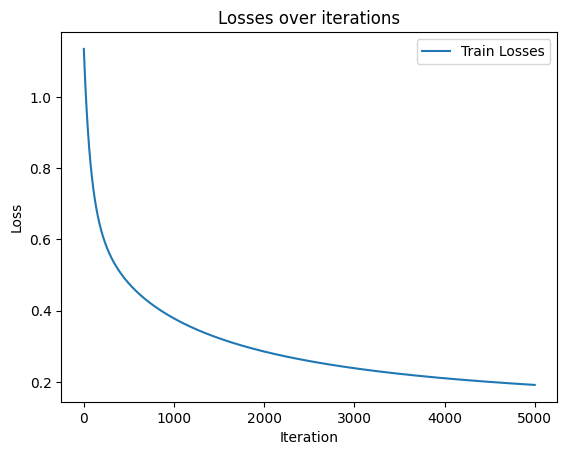

Evaluation metrics:
Accuracy: 0.9333333333333333
precisions: [np.float64(1.0), np.float64(0.8823529411764706), np.float64(0.9285714285714286)]
recalls: [np.float64(1.0), np.float64(0.9375), np.float64(0.8666666666666667)]
f1_scores: [np.float64(1.0), np.float64(0.9090909090909091), np.float64(0.896551724137931)]
Macro Precision: 0.9369747899159663
Macro Recall: 0.9347222222222222
Macro F1 Score: 0.9352142110762801
Weighted Precision: 0.9343604108309991
Weighted Recall: 0.9333333333333333


In [48]:
# Testing the LogisticRegression class.

# Step 1: Prepare data
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the last two features for simplicity
y = iris.target  # Target variable with 3 classes

# Split data into training and test datasets
idx = np.arange(0, len(X), 1)
np.random.shuffle(idx)
idx_train = idx[0:int(.7 * len(X))]
idx_test = idx[len(idx_train):len(idx)]

X_train = X[idx_train]
X_test = X[idx_test]
y_train = y[idx_train]
y_test = y[idx_test]

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add intercept
intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis=1)

# One-hot encoding the labels
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

# Create one-hot encoded labels
Y_train_encoded = one_hot_encode(y_train, len(set(y)))  # Use all classes

# Step 2: Create and fit the logistic regression model
log_reg_ridge = LogisticRegression(k=len(set(y)), n=X_train.shape[1] - 1, method='batch', use_penalty=True, penalty='ridge', lambda_=0.1)
log_reg_ridge.fit(X_train, Y_train_encoded)

# Step 3: Predict on the test set
y_pred = log_reg_ridge.predict(X_test)

# Step 4: Plot the loss vs iteration
log_reg_ridge.plot()

# Step 5: Evaluation metrics
print("Evaluation metrics:")

accuracy = log_reg_ridge.accuracy(y_test, y_pred)
precisions = [log_reg_ridge.precision(y_test, y_pred, c) for c in set(y)]
recalls = [log_reg_ridge.recall(y_test, y_pred, c) for c in set(y)]
f1_scores = [log_reg_ridge.f1_score(y_test, y_pred, c) for c in set(y)]


print(f"Accuracy: {accuracy}")
print(f"precisions: {precisions}")
print(f"recalls: {recalls}")
print(f"f1_scores: {f1_scores}")

macro_precision = log_reg_ridge.macro_precision(y_test, y_pred)
macro_recall = log_reg_ridge.macro_recall(y_test, y_pred)
macro_f1 = log_reg_ridge.macro_f1(y_test, y_pred)

print(f"Macro Precision: {macro_precision}")
print(f"Macro Recall: {macro_recall}")
print(f"Macro F1 Score: {macro_f1}")

# Assuming class labels are 0, 1, 2 for iris dataset
class_labels = np.unique(y_test)
weights = [np.sum(y_test == c) / len(y_test) for c in class_labels]  # Weights based on class frequency
precisions = [log_reg_ridge.precision(y_test, y_pred, c) for c in class_labels]
recalls = [log_reg_ridge.recall(y_test, y_pred, c) for c in class_labels]

weighted_precision = log_reg_ridge.weighted_precision(class_labels, weights, precisions)
weighted_recall = log_reg_ridge.weighted_recall(class_labels, weights, recalls)

print(f"Weighted Precision: {weighted_precision}")
print(f"Weighted Recall: {weighted_recall}")
